# Task 1 Implement a Machine Learning Model for Classification problem
#Heart Disease Dataset

####Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore") #ignoring warnings

#Data Collection

In [ ]:
#Loading the csv data to a pandas Dataframe
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# First 5 rows of a dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Last 5 rows of a dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#Data Preprocessing

In [ ]:
#number of rows and columns in the dataset
df.shape

(1025, 14)

In [ ]:
#To data types of a  dataset
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#To columns of a dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#know the some information of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#To know null values/missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Encoding Categorical Variables

In [ ]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

#Scaling Numerical Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize the scaler
scaler = MinMaxScaler()  # or StandardScaler()

#Fit and transform the numerical columns
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])


#Step 2 : Exploratory Data Analysis (EDA)

In [ ]:
#Statistical measure about the dataset
df.describe(include='all')

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.354827,0.273973,0.149268,0.596291,0.336585,0.172825,0.513171,0.162927,...,0.014634,0.470244,0.457561,0.220488,0.130732,0.067317,0.017561,0.062439,0.530732,0.400000
std,0.189006,0.460373,0.165252,0.117791,0.356527,0.175616,0.472772,0.189525,0.500070,0.369479,...,0.120142,0.499357,0.498439,0.414778,0.337271,0.250693,0.131413,0.242069,0.499298,0.490137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.465649,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.260274,0.000000,0.618321,0.000000,0.129032,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,0.725191,1.000000,0.290323,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [ ]:
#To know nunique values
df.nunique()

age           41
sex            2
trestbps      49
chol         152
fbs            2
thalach       91
exang          2
oldpeak       40
target         2
cp_1           2
cp_2           2
cp_3           2
restecg_1      2
restecg_2      2
slope_1        2
slope_2        2
ca_1           2
ca_2           2
ca_3           2
ca_4           2
thal_1         2
thal_2         2
thal_3         2
dtype: int64

In [ ]:
#checking the duplicates of the dataset
df.duplicated().value_counts()

True     723
False    302
dtype: int64

In [ ]:
#To know size of dataset
df.size

14350

In [ ]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [ ]:
df['age'].nunique()

41

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df['sex'].nunique()

2

In [ ]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [ ]:
df['trestbps'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

In [ ]:
df['trestbps'].nunique()

49

In [ ]:
df['chol'].value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

In [ ]:
df['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [ ]:
df['chol'].value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

In [ ]:
df['chol'].nunique()

152

In [ ]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [ ]:
df['fbs'].unique()

array([0, 1])

In [ ]:
df['fbs'].nunique()

2

In [ ]:
df['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [ ]:
df['restecg'].unique()

array([1, 0, 2])

In [ ]:
df['thalach'].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

In [ ]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [ ]:
df['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

In [ ]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [ ]:
df['oldpeak'].nunique()

40

In [ ]:
df['oldpeak'].value_counts()

0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64

In [ ]:
df['slope'].unique()

array([2, 0, 1])

In [ ]:
df['slope'].nunique()

3

In [ ]:
df['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [ ]:
df['ca'].unique()

array([2, 0, 1, 3, 4])

In [ ]:
df['ca'].nunique()

5

In [ ]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [ ]:
df['thal'].unique()

array([3, 2, 1, 0])

In [ ]:
df['thal'].nunique()

4

In [ ]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].nunique()

2

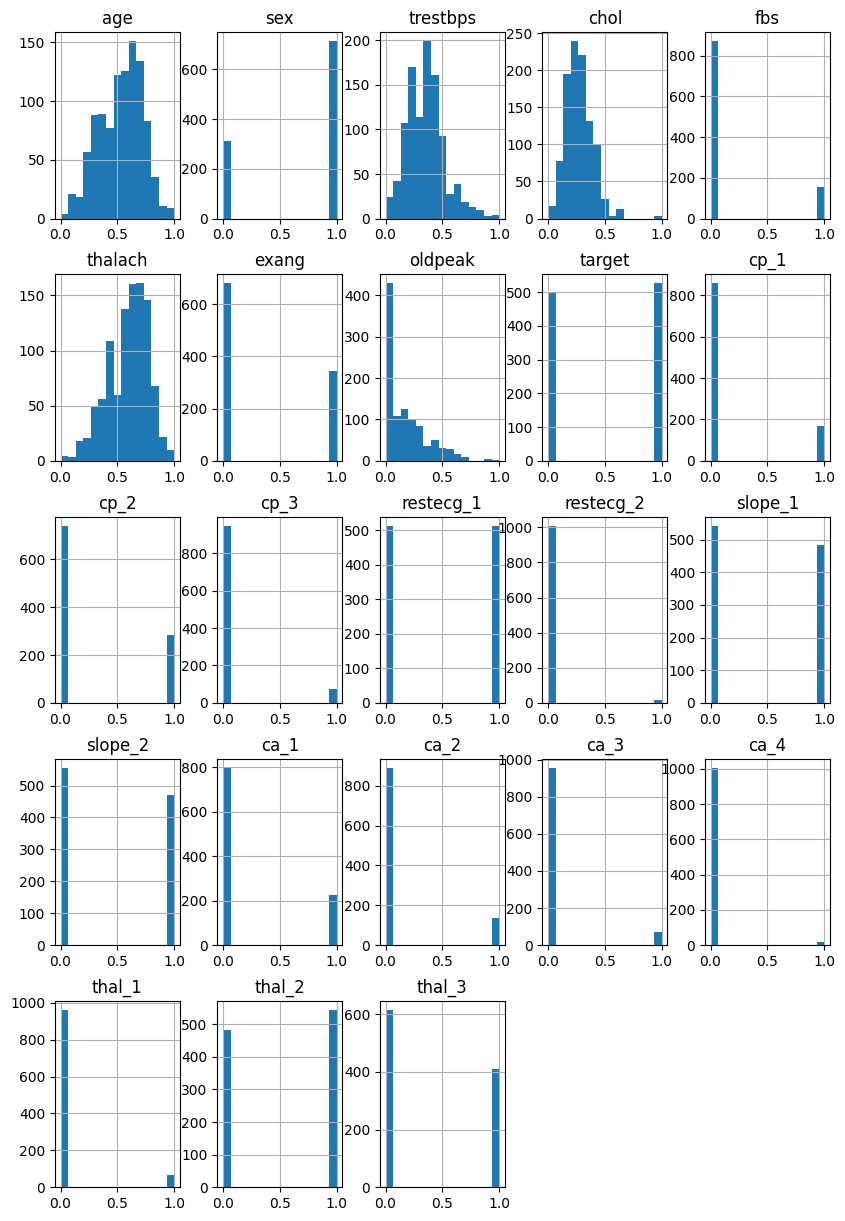

In [ ]:
df.hist(bins=15,figsize=(10,15))
plt.show()

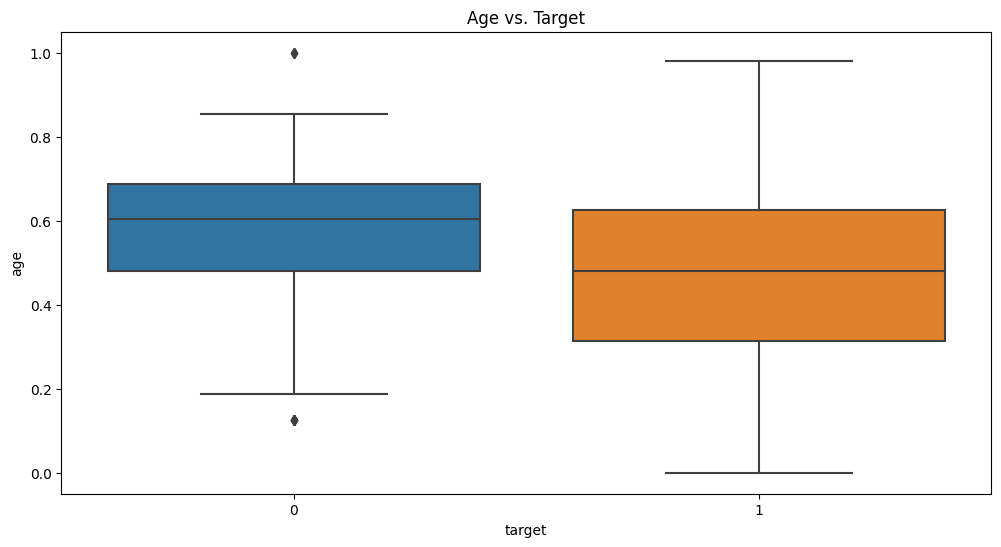

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs. Target")
plt.show()


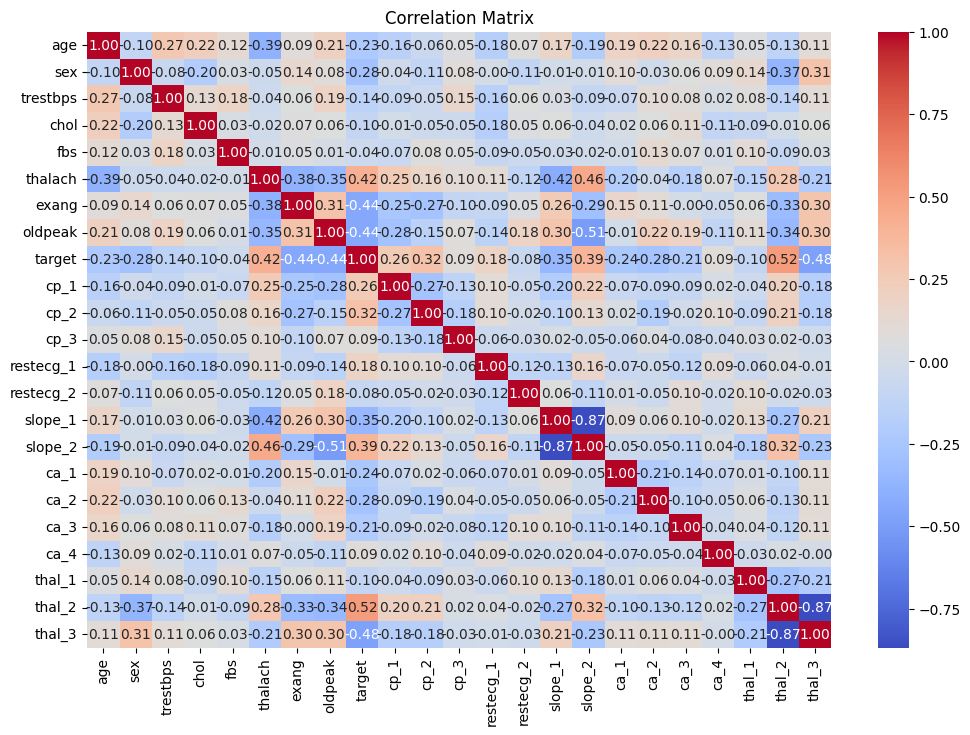

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs. Target")
plt.show()

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

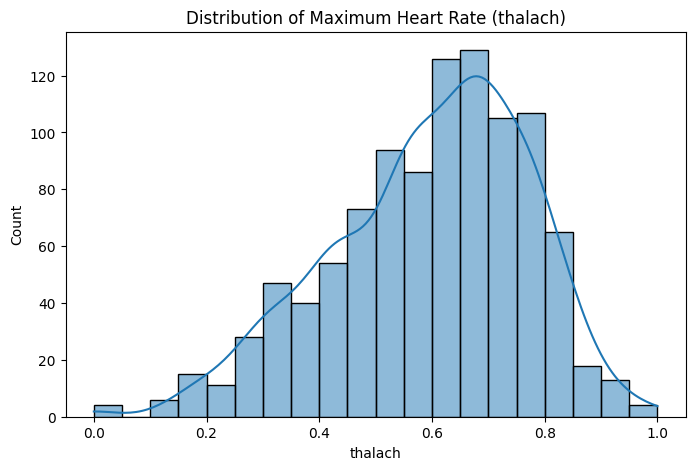

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['thalach'], kde=True)
plt.title("Distribution of Maximum Heart Rate (thalach)")
plt.show()

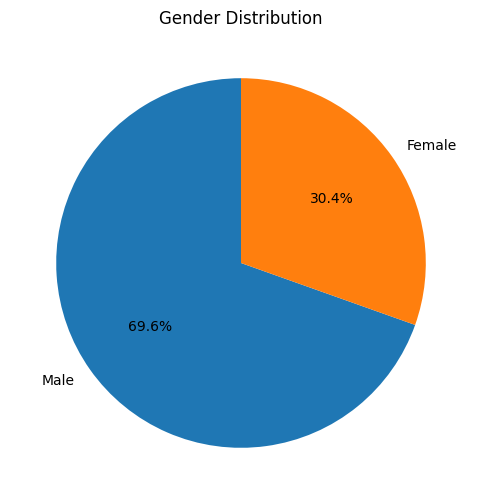

In [ ]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

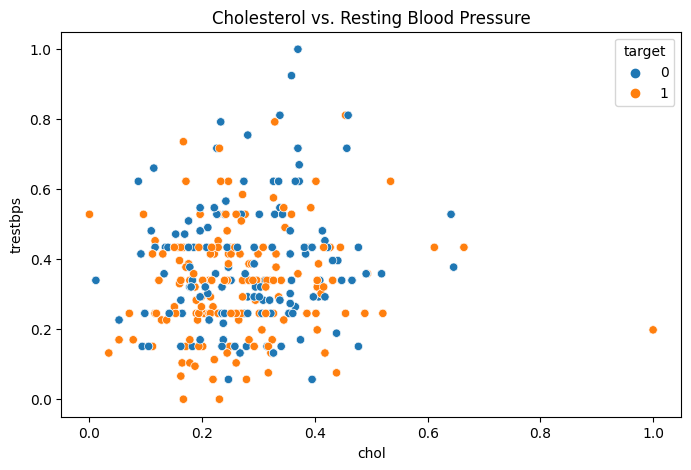

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='chol', y='trestbps', hue='target', data=df)
plt.title("Cholesterol vs. Resting Blood Pressure")
plt.show()

In [ ]:
#dependent variable
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

#Step 3 Model Implementation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [ ]:
#Selceting Features
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(820, 22) (205, 22)


In [ ]:
print(y_train.shape,y_test.shape)

(820,) (205,)


In [ ]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 4 Model Evaluation

###KNN classifier

In [ ]:
#Implement and evaluate K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_classifier.predict(X_test_scaled)

In [ ]:
#Model Evaluation

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)

K-Nearest Neighbors (KNN) Accuracy: 0.8390243902439024


In [ ]:
# Classification Report
Cr_knn = classification_report(y_test, knn_predictions)
print(Cr_knn)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       102
           1       0.83      0.85      0.84       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [ ]:
# ROC-AUC score for K-Nearest Neighbors (KNN) model
knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_scaled)[:, 1])
print("K-Nearest Neighbors (KNN) ROC-AUC:", knn_roc_auc)

K-Nearest Neighbors (KNN) ROC-AUC: 0.9421758994860079


In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_predictions)
print(cm_knn)

[[84 18]
 [15 88]]


In [ ]:
#Cross Validation & Overfitting

In [ ]:
# Model Evaluation on the testing set
initial_accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.8390243902439024


In [ ]:
# Overfitting Check
training_accuracy = knn_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.948780487804878


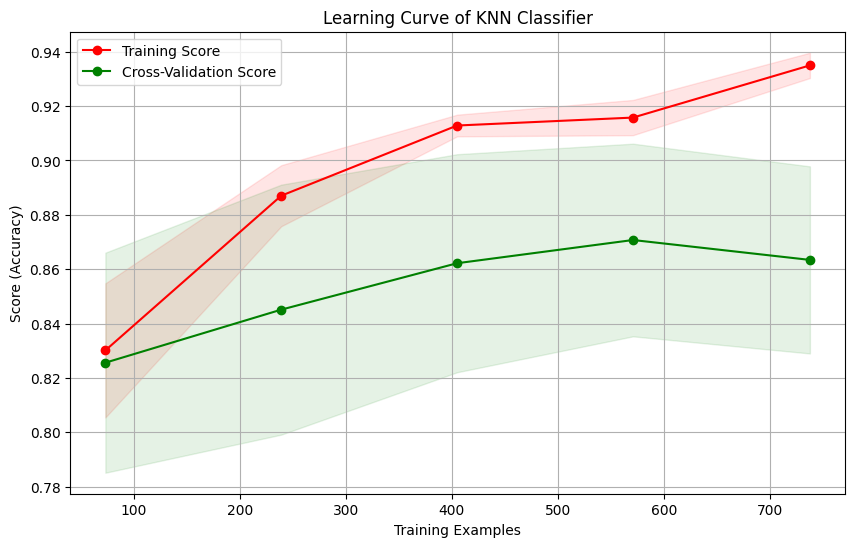

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve,cross_val_score

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes,
                                                            scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score (Accuracy)")
    plt.title("Learning Curve of KNN Classifier")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.show()


plot_learning_curve(knn_classifier, X_train_scaled, y_train, cv=10)



K=1: Average Cross-Validation Accuracy=0.9878048780487804
K=2: Average Cross-Validation Accuracy=0.952439024390244
K=3: Average Cross-Validation Accuracy=0.921951219512195
K=4: Average Cross-Validation Accuracy=0.8853658536585366
K=5: Average Cross-Validation Accuracy=0.8634146341463416
K=6: Average Cross-Validation Accuracy=0.8768292682926828
K=7: Average Cross-Validation Accuracy=0.8804878048780488
K=8: Average Cross-Validation Accuracy=0.8609756097560975
K=9: Average Cross-Validation Accuracy=0.8621951219512194
K=10: Average Cross-Validation Accuracy=0.8475609756097562
K=11: Average Cross-Validation Accuracy=0.8451219512195122
K=12: Average Cross-Validation Accuracy=0.8365853658536585
K=13: Average Cross-Validation Accuracy=0.8402439024390244
K=14: Average Cross-Validation Accuracy=0.8292682926829269
K=15: Average Cross-Validation Accuracy=0.8426829268292684
K=16: Average Cross-Validation Accuracy=0.8353658536585366
K=17: Average Cross-Validation Accuracy=0.8256097560975609
K=18: Av

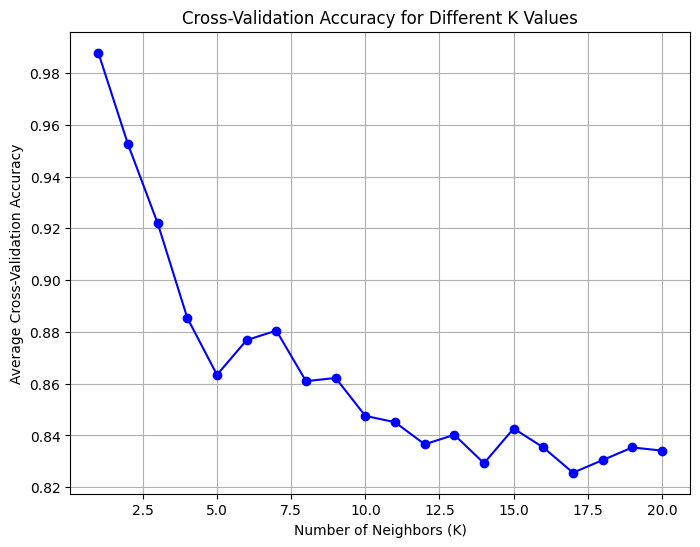

In [ ]:
#Initialize an empty list to store cross-validation accuracies
cv_accuracies = []

# Find the optimal number of neighbors (K) using cross-validation
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')
    average_cv_accuracy = np.mean(cv_scores)
    cv_accuracies.append(average_cv_accuracy)
    print(f"K={k}: Average Cross-Validation Accuracy={average_cv_accuracy}")

# Plot the cross-validation accuracies for different K values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), cv_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.grid(True)
plt.show();



In [ ]:
#optimal K value (e.g., 7 based on the plot)
optimal_k = 7

# Retrain the KNN model with the optimal K value
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
final_accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.8195121951219512


#Naive Bayes

In [ ]:
# Implement and evaluate Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8048780487804879


In [ ]:
#Classification Report
Cr_nb = classification_report(y_test, nb_predictions)
print(Cr_nb)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [ ]:
# ROC-AUC score for Naive Bayes model
nb_roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes ROC-AUC: 0.8423281934132877


In [ ]:
#Confusion matrix
cm_nb = confusion_matrix(y_test, nb_predictions)
print(cm_nb)

[[75 27]
 [13 90]]


In [ ]:
#Cross Validation & Overfitting check

In [ ]:
#Model Evaluation on the testing set
initial_accuracy = nb_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.7121951219512195


In [ ]:
#Overfitting Check
training_accuracy = nb_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7634146341463415


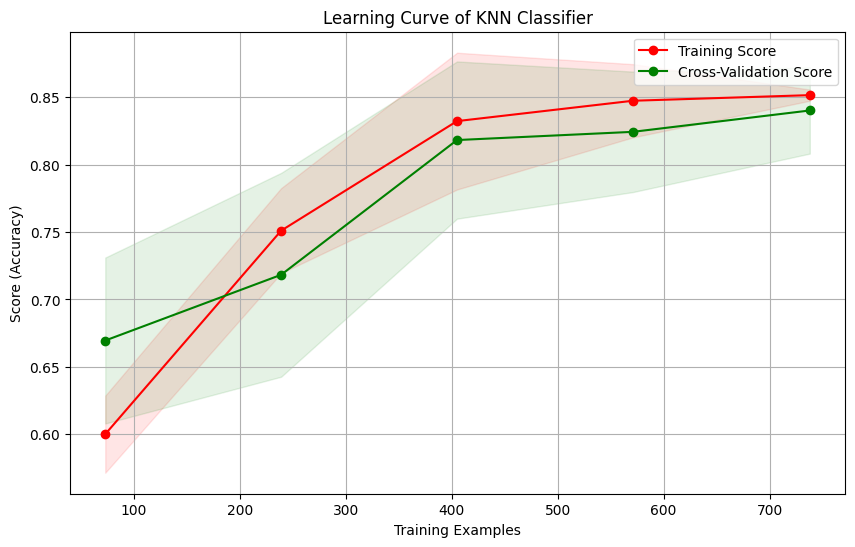

In [ ]:
#plotting Learning Curve
plot_learning_curve(nb_classifier, X_train_scaled, y_train, cv=10)

In [ ]:
#Decision Tree

In [ ]:
# Implement and evaluate Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_predictions = dt_classifier.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [ ]:
#Classification Report
Cr_dtc = classification_report(y_test, dt_predictions)
print(Cr_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
# ROC-AUC score for Decision Tree model
dt_roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree ROC-AUC: 1.0


In [ ]:
#Confusion Matrix
cm_dtc = confusion_matrix(y_test, dt_predictions)
print(cm_dtc)


[[102   0]
 [  0 103]]


In [ ]:
#Cross Validation & overfitting check

In [ ]:
# Model Evaluation on the testing set
initial_accuracy = dt_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.7073170731707317


In [ ]:
#Overfitting Check
training_accuracy = dt_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.6902439024390243


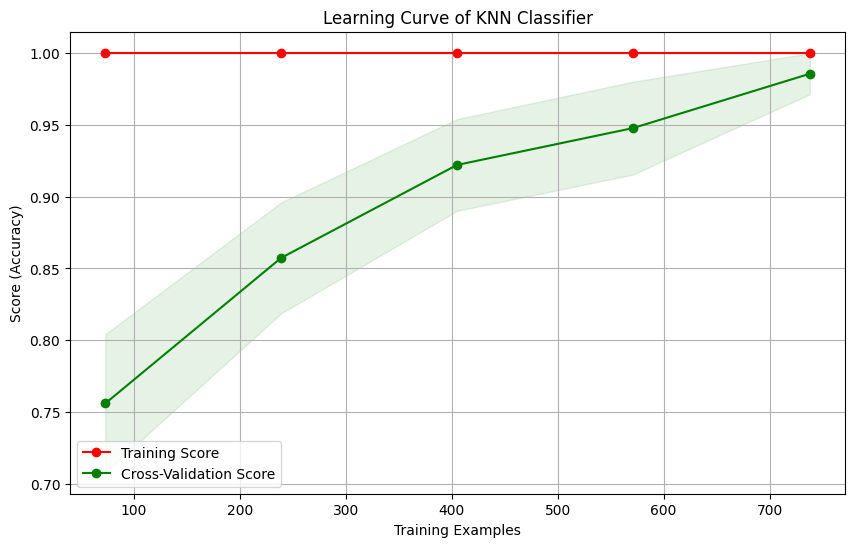

In [ ]:

#Plotting Learning curve
plot_learning_curve(dt_classifier, X_train_scaled, y_train, cv=10)
